<a href="https://colab.research.google.com/github/uteThAn/BaitapAI/blob/main/robot_3bac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [ ]:
def sind(x):
    return math.sin(math.radians(x))
 
def cosd(x):
    return math.cos(math.radians(x))

In [ ]:
Px=[]
Py=[]
tt1=[] 
tt2=[]
tt3=[]
phi=[]
for p in range(0,30,15):
  for i in range(-120,120,1):
    for j in range(-45,45,1):
      theta1=(math.radians(i))
      theta2=(math.radians(j))
      x=(math.radians(p))-theta1-theta2
      Px.append(50*cosd(i) + 40*cosd(i+j)+20*cosd(i+j+x))
      Py.append(50*sind(i) + 40*sind(i+j)+20*sind(i+j+x))
      tt1.append(theta1)
      tt2.append(theta2)
      tt3.append(x)
      phi.append(p)
      

In [ ]:
data = pd.DataFrame(np.c_[tt1,tt2,tt3,Px,Py,phi],columns=['tt1','tt2','tt3','Px','Py','phi'])

In [ ]:
data

,tt1,tt2,tt3,Px,Py,phi
0,-2.094395,-0.785398,2.879793,-82.671088,-59.794452,0.0
1,-2.094395,-0.767945,2.862340,-82.376429,-60.792674,0.0
2,-2.094395,-0.750492,2.844887,-82.064492,-61.785637,0.0
3,-2.094395,-0.733038,2.827433,-81.735372,-62.773040,0.0
4,-2.094395,-0.715585,2.809980,-81.389166,-63.754588,0.0
...,...,...,...,...,...,...
43195,2.076942,0.698132,-2.513274,-79.923051,66.044934,15.0
43196,2.076942,0.715585,-2.530727,-80.301669,65.075368,15.0
43197,2.076942,0.733038,-2.548181,-80.663405,64.099381,15.0
43198,2.076942,0.750492,-2.565634,-81.008150,63.117268,15.0


In [ ]:
y = data.drop(['Px','Py','phi'],axis=1)
x = data.drop(['tt1','tt2','tt3'],axis=1)

In [ ]:
print(x)
print(y)

              Px         Py   phi
0     -82.671088 -59.794452   0.0
1     -82.376429 -60.792674   0.0
2     -82.064492 -61.785637   0.0
3     -81.735372 -62.773040   0.0
4     -81.389166 -63.754588   0.0
...          ...        ...   ...
43195 -79.923051  66.044934  15.0
43196 -80.301669  65.075368  15.0
43197 -80.663405  64.099381  15.0
43198 -81.008150  63.117268  15.0
43199 -81.335800  62.129323  15.0

[43200 rows x 3 columns]
            tt1       tt2       tt3
0     -2.094395 -0.785398  2.879793
1     -2.094395 -0.767945  2.862340
2     -2.094395 -0.750492  2.844887
3     -2.094395 -0.733038  2.827433
4     -2.094395 -0.715585  2.809980
...         ...       ...       ...
43195  2.076942  0.698132 -2.513274
43196  2.076942  0.715585 -2.530727
43197  2.076942  0.733038 -2.548181
43198  2.076942  0.750492 -2.565634
43199  2.076942  0.767945 -2.583087

[43200 rows x 3 columns]


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(34560, 3)
(34560, 3)
(8640, 3)
(8640, 3)


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode="min",restore_best_weights=True)
model = Sequential()
model.add(Dense(784,activation='relu',input_shape=(3,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(3))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 784)               3136      
                                                                 
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 dense_6 (Dense)             (None, 128)               65664     
                                                                 
 dense_7 (Dense)             (None, 3)                 387       
                                                                 
Total params: 471,107
Trainable params: 471,107
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compile

model.compile(optimizer='Adam',loss='mse',metrics=['accuracy']) #mse,mae : sai số bình phương trung bình

In [ ]:
history = model.fit(x_train,y_train,batch_size=20,epochs=100,verbose=1,validation_split=0.2,callbacks=[callback])

Epoch 1/100
1383/1383 [==============================] - 10s 7ms/step - loss: 0.2343 - accuracy: 0.8574 - val_loss: 0.1010 - val_accuracy: 0.8728
Epoch 2/100
1383/1383 [==============================] - 10s 8ms/step - loss: 0.1008 - accuracy: 0.8721 - val_loss: 0.0959 - val_accuracy: 0.8759
Epoch 3/100
1383/1383 [==============================] - 10s 7ms/step - loss: 0.0973 - accuracy: 0.8725 - val_loss: 0.0968 - val_accuracy: 0.8707
Epoch 4/100
1383/1383 [==============================] - 10s 7ms/step - loss: 0.0967 - accuracy: 0.8717 - val_loss: 0.0955 - val_accuracy: 0.8753
Epoch 5/100
1383/1383 [==============================] - 10s 8ms/step - loss: 0.0964 - accuracy: 0.8717 - val_loss: 0.0946 - val_accuracy: 0.8695
Epoch 6/100
1383/1383 [==============================] - 10s 7ms/step - loss: 0.0960 - accuracy: 0.8708 - val_loss: 0.0946 - val_accuracy: 0.8746
Epoch 7/100
1383/1383 [==============================] - 10s 7ms/step - loss: 0.0958 - accuracy: 0.8721 - val_loss: 0.0929 -

In [ ]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('độ chính xác kiểm tra là: ',score[1])

Sai số kiểm tra là:  0.09336736798286438
độ chính xác kiểm tra là:  0.8777777552604675


In [ ]:
model.save('/content/drive/MyDrive/AI/robot3.h5')

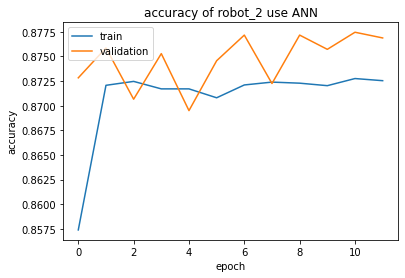

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy of robot_2 use ANN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [ ]:
ypr=model.predict(x_test)
data = pd.DataFrame(np.c_[y_test,ypr,x_test],columns=['tt1','tt2','tt3','tt1_pre','tt2_pre','tt3_pre','Px','Py','phi'])
data

,tt1,tt2,tt3,tt1_pre,tt2_pre,tt3_pre,Px,Py,phi
0,-1.745329,0.314159,1.431170,-1.548829,0.001004,1.590444,0.161768,-108.580774,0.0
1,-0.366519,0.174533,0.453786,-0.276000,-0.038424,0.559371,105.606261,-29.211328,15.0
2,-0.663225,-0.069813,0.733038,-0.717241,-0.020251,0.723393,84.159222,-70.739665,0.0
3,1.099557,-0.401426,-0.436332,0.844060,0.010206,-0.590350,68.759649,83.000536,15.0
4,-1.361357,-0.349066,1.710423,-1.529036,0.000962,1.567464,2.637591,-108.397721,0.0
...,...,...,...,...,...,...,...,...,...
8635,-2.042035,-0.593412,2.897247,-2.131545,-0.494024,2.949363,-74.664255,-74.510662,15.0
8636,-0.994838,0.645772,0.610865,-0.644774,-0.025099,0.906893,83.685369,-62.253979,15.0
8637,1.396263,0.296706,-1.692969,1.544442,0.048776,-1.585205,1.957780,108.856501,0.0
8638,1.029744,0.296706,-1.064651,1.175604,0.028168,-0.918828,40.626956,100.982857,15.0


In [ ]:
x_test

,tt1,tt2,tt3
17792,1.343904,0.296706,-1.640609
38321,1.134464,0.453786,-1.326450
26588,-1.134464,-0.122173,1.518436
20500,1.867502,0.436332,-2.303835
15047,0.820305,-0.488692,-0.331613
...,...,...,...
11264,0.087266,-0.541052,0.453786
18997,1.588250,-0.663225,-0.925025
17933,1.378810,-0.383972,-0.994838
41497,1.762783,-0.663225,-0.837758
